In [2]:
from requests import get
from io import BytesIO
from scipy.io import wavfile
from scipy.io.wavfile import read
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
import wave
import sys

<ipython-input-3-51c651d0d751>:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal = np.fromstring(signal, "Int16")
<ipython-input-3-51c651d0d751>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "Int16")


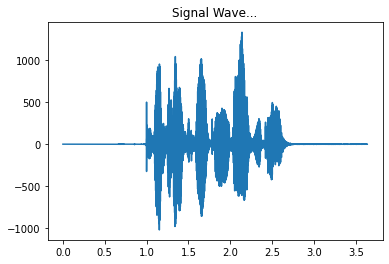

In [3]:
spf = wave.open("03-01-01-01-01-02-24.wav", "r")

signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")
fs = spf.getframerate()

if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)
    
    
Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

In [5]:
sample_rate = 16000
sig = np.frombuffer(spf.readframes(sample_rate), dtype=np.int16)

In [6]:
sig = sig[:]

In [7]:
sig = sig[25000:32000]

<ipython-input-9-e31c71ef709a>:9: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=0).
  plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/opt/conda/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/conda/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/conda/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


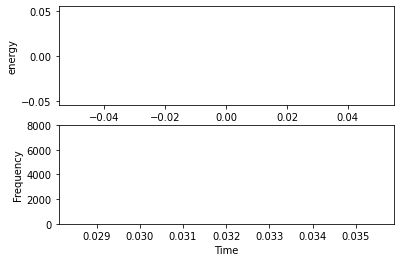

In [9]:
plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()